In [38]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import sys
import math
import time

In [39]:
df = pd.read_csv('Flight_Data.csv')

In [40]:
Geographical_map = nx.Graph()

In [41]:
df

,Airline,SourceAirport,DestinationAirport,SourceAirport_City,SourceAirport_Country,SourceAirport_Latitude,SourceAirport_Longitude,SourceAirport_Altitude,DestinationAirport_City,DestinationAirport_Country,DestinationAirport_Latitude,DestinationAirport_Longitude,DestinationAirport_Altitude,Distance,FlyTime,Price
0,Pegasus Airlines,Sabiha Gökçen International Airport,Imam Khomeini International Airport,Istanbul,Turkey,40.898602,29.309200,312,Tehran,Iran,35.416100,51.152199,3305,1998.541333,2.624833,271.489760
1,Turkish Airlines,Atatürk International Airport,Imam Khomeini International Airport,Istanbul,Turkey,40.976898,28.814600,163,Tehran,Iran,35.416100,51.152199,3305,2040.978811,2.882362,300.589499
2,Emirates,Dubai International Airport,Imam Khomeini International Airport,Dubai,United Arab Emirates,25.252800,55.364399,62,Tehran,Iran,35.416100,51.152199,3305,1199.863567,1.536046,210.215879
3,Etihad Airways,Abu Dhabi International Airport,Imam Khomeini International Airport,Abu Dhabi,United Arab Emirates,24.433001,54.651100,88,Tehran,Iran,35.416100,51.152199,3305,1266.681453,2.144199,175.864733
4,Air Arabia,Sharjah International Airport,Imam Khomeini International Airport,Sharjah,United Arab Emirates,25.328600,55.517200,111,Tehran,Iran,35.416100,51.152199,3305,1196.902147,1.772627,174.332843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6831,Kenmore Air,Boeing Field King County International Airport,William R Fairchild International Airport,Seattle,United States,47.529999,-122.302002,21,Port Angeles,United States,48.120201,-123.500000,291,110.930397,0.161072,31.661891
6832,Kenmore Air,Boeing Field King County International Airport,Orcas Island Airport,Seattle,United States,47.529999,-122.302002,21,Eastsound,United States,48.708199,-122.910004,31,138.564899,0.899144,26.201671
6833,Kenmore Air,William R Fairchild International Airport,Boeing Field King County International Airport,Port Angeles,United States,48.120201,-123.500000,291,Seattle,United States,47.529999,-122.302002,21,110.930397,0.751768,99.285196
6834,Kenmore Air,Friday Harbor Airport,Boeing Field King County International Airport,Friday Harbor,United States,48.521999,-123.024002,113,Seattle,United States,47.529999,-122.302002,21,122.677708,1.119010,19.599675


In [42]:
df.max()

Airline                                       WestJet
SourceAirport                   Şanlıurfa GAP Airport
DestinationAirport              Şanlıurfa GAP Airport
SourceAirport_City                              Çorlu
SourceAirport_Country                   United States
SourceAirport_Latitude                      76.426102
SourceAirport_Longitude                       61.5439
SourceAirport_Altitude                           7820
DestinationAirport_City                         Çorlu
DestinationAirport_Country              United States
DestinationAirport_Latitude                 76.426102
DestinationAirport_Longitude                  61.5439
DestinationAirport_Altitude                      7820
Distance                                 13400.077028
FlyTime                                      17.53892
Price                                     1397.172097
dtype: object

In [43]:
df.min()

Airline                            40-Mile Air
SourceAirport                   Abadan Airport
DestinationAirport              Abadan Airport
SourceAirport_City                      Abadan
SourceAirport_Country                   Canada
SourceAirport_Latitude               19.721399
SourceAirport_Longitude            -176.645996
SourceAirport_Altitude                     -70
DestinationAirport_City                 Abadan
DestinationAirport_Country              Canada
DestinationAirport_Latitude          19.721399
DestinationAirport_Longitude       -176.645996
DestinationAirport_Altitude                -70
Distance                              9.151537
FlyTime                               0.042655
Price                                 5.866997
dtype: object

In [44]:
# dict = df.to_dict()

In [45]:
source_airport_dict = dict['SourceAirport']
destination_airport_dict = dict['DestinationAirport']
distance_dict = dict['Distance']
SourceAirport_Latitude_dict = dict['SourceAirport_Latitude']
SourceAirport_Altitude_dict = dict['SourceAirport_Altitude']
SourceAirport_Longitude_dict = dict['SourceAirport_Longitude']
DestinationAirport_Latitude_dict = dict['DestinationAirport_Latitude']
DestinationAirport_Altitude_dict = dict['DestinationAirport_Altitude']
DestinationAirport_Longitude_dict = dict['DestinationAirport_Longitude']
FlyTime_dict = dict['FlyTime']
Price_dict = dict['Price']

In [9]:
for i in source_airport_dict:
    Geographical_map.add_edge(source_airport_dict[i], destination_airport_dict[i], weight=distance_dict[i])

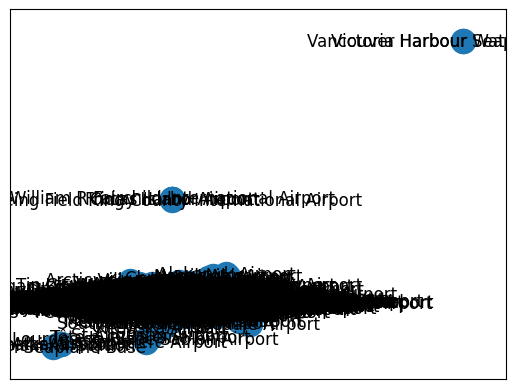

In [10]:
nx.draw_networkx(Geographical_map)

In [11]:
source_airport_set = set(df['SourceAirport'])
destination_airport_set = set(df['DestinationAirport'])

In [12]:
destination_airport_set.update(source_airport_set)

In [47]:
nodes = list(destination_airport_set)

TypeError: 'NoneType' object is not iterable

In [14]:
parameter = []

In [15]:
min_items_list = list(df.min())
max_items_list = list(df.max())

In [16]:
for i in range(len(distance_dict)):
    distance_dict[i] = (distance_dict[i] - min_items_list[13]) / (max_items_list[13] - min_items_list[13])
    SourceAirport_Latitude_dict[i] = (SourceAirport_Latitude_dict[i] - min_items_list[5]) / (max_items_list[5] - min_items_list[5])
    SourceAirport_Altitude_dict[i] = (SourceAirport_Altitude_dict[i] - min_items_list[7]) / (max_items_list[7] - min_items_list[7])
    SourceAirport_Longitude_dict[i] = (SourceAirport_Longitude_dict[i] - min_items_list[6]) / (max_items_list[6] - min_items_list[6])
    DestinationAirport_Latitude_dict[i] = (DestinationAirport_Latitude_dict[i] - min_items_list[10]) / (max_items_list[10] - min_items_list[10])
    DestinationAirport_Altitude_dict[i] = (DestinationAirport_Altitude_dict[i] - min_items_list[12]) / (max_items_list[12] - min_items_list[12])
    DestinationAirport_Longitude_dict[i] = (DestinationAirport_Longitude_dict[i] - min_items_list[11]) / (max_items_list[11] - min_items_list[11])
    FlyTime_dict[i] = (FlyTime_dict[i] - min_items_list[14]) / (max_items_list[14] - min_items_list[14])
    Price_dict[i] = (Price_dict[i] - min_items_list[15]) / (max_items_list[15] - min_items_list[15])    

In [17]:
for i in DestinationAirport_Longitude_dict:
    golabi = math.sqrt((math.pow(DestinationAirport_Latitude_dict[i] - SourceAirport_Latitude_dict[i], 2)) + 
    (math.pow(DestinationAirport_Altitude_dict[i] - SourceAirport_Altitude_dict[i], 2)) +
    (math.pow(DestinationAirport_Longitude_dict[i] - SourceAirport_Longitude_dict[i], 2)))

    parameter.append(golabi + FlyTime_dict[i] + Price_dict[i] + distance_dict[i])

In [18]:
class Graph(object):
    def __init__(self, nodes, init_graph):
        self.nodes = nodes
        self.graph = init_graph
        
    
    def get_nodes(self):
        "Returns the nodes of the graph."
        return self.nodes
    
    def get_outgoing_edges(self, node):
        "Returns the neighbors of a node."
        connections = []
        for out_node in self.nodes:
            if self.graph[node].get(out_node, False) != False:
                connections.append(out_node)
        return connections
    
    def value(self, node1, node2):
        "Returns the value of an edge between two nodes."
        return self.graph[node1][node2]

In [19]:
init_graph = {}
for node in nodes:
    init_graph[node] = {}

for i in source_airport_dict:
    init_graph[source_airport_dict[i]][destination_airport_dict[i]] = parameter[i]

In [20]:
def dijkstra_algorithm(graph, start_node):
    unvisited_nodes = list(graph.get_nodes())
   
    shortest_path = {}
    
    previous_nodes = {}
    
    max_value = sys.maxsize
    for node in unvisited_nodes:
        shortest_path[node] = max_value  
    shortest_path[start_node] = 0
    
    while unvisited_nodes:
        current_min_node = None
        for node in unvisited_nodes:
            if current_min_node == None:
                current_min_node = node
            elif shortest_path[node] < shortest_path[current_min_node]:
                current_min_node = node
                
        neighbors = graph.get_outgoing_edges(current_min_node)
        for neighbor in neighbors:
            tentative_value = shortest_path[current_min_node] + graph.value(current_min_node, neighbor)
            if tentative_value < shortest_path[neighbor]:
                shortest_path[neighbor] = tentative_value
                previous_nodes[neighbor] = current_min_node
 
        unvisited_nodes.remove(current_min_node)
    
    return previous_nodes, shortest_path

In [21]:
def print_result(previous_nodes, shortest_path, start_node, target_node):
    path = []
    node = target_node
    
    while node != start_node:
        path.append(node)
        node = previous_nodes[node]
 
    path.append(start_node)
    
    print("We found the following best path with a value of {}.".format(shortest_path[target_node]))
    print(" -> ".join(reversed(path)))
    return path

In [22]:
graph = Graph(nodes, init_graph)
start = time.time()
previous_nodes, shortest_path = dijkstra_algorithm(graph=graph, start_node="Los Angeles International Airport")
path = print_result(previous_nodes, shortest_path, start_node="Los Angeles International Airport", target_node="Imam Khomeini International Airport")
end = time.time()
time = int((end - start)* 1000)

We found the following best path with a value of 4.033416851486795.
Los Angeles International Airport -> Atatürk International Airport -> Imam Khomeini International Airport


In [23]:
f = open("dijkstra.txt", 'a')
total_time = 0 
total_price = 0
total_duration = 0
f.write(f"dijkstra Algorithm \n")
f.write(f"Execution Time: {round(time, 2)}ms \n")
f.write(".-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.- \n")
for i in range(len(path)-1):
    df6 = df[(df['SourceAirport'] == path[i]) & (df['DestinationAirport'] == path[i+1])]
    f.write(f"Flight #{i+1} ({df6.iloc[0]['Airline']}): \n")
    f.write(f"From: {df6.iloc[0]['SourceAirport']} - {df6.iloc[0]['SourceAirport_City']}, {df6.iloc[0]['SourceAirport_Country']} \n")
    f.write(f"To: {df6.iloc[0]['DestinationAirport']} - {df6.iloc[0]['DestinationAirport_City']}, {df6.iloc[0]['DestinationAirport_Country']} \n")
    f.write(f"Duration: {round(df6.iloc[0]['Distance'], 2)}km \n")
    total_duration += df6.iloc[0]['Distance']
    f.write(f"Time: {round(df6.iloc[0]['FlyTime'], 2)}h \n")
    total_time += df6.iloc[0]['FlyTime']
    f.write(f"Price: {round(df6.iloc[0]['Price'], 2)}$ \n")
    total_price += df6.iloc[0]['Price']
    f.write("---------------------------- \n")

f.write(f"Total Duration: {round(total_duration, 2)}km \n")
f.write(f"Total Time: {round(total_time, 2)}h \n")  
f.write(f"Total Price: {round(total_price, 2)}$ \n")

f.close()

f = open("dijkstra.txt", "r")
print(f.read())

dijkstra Algorithm 
Execution Time: 267ms 
.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.- 
Flight #1 (Turkish Airlines): 
From: Imam Khomeini International Airport - Tehran, Iran 
To: Atatürk International Airport - Istanbul, Turkey 
Duration: 2040.98km 
Time: 3.15h 
Price: 238.35$ 
---------------------------- 
Flight #2 (Turkish Airlines): 
From: Atatürk International Airport - Istanbul, Turkey 
To: Los Angeles International Airport - Los Angeles, United States 
Duration: 11034.24km 
Time: 13.89h 
Price: 1199.2$ 
---------------------------- 
Total Duration: 13075.21km 
Total Time: 17.04h 
Total Price: 1437.55$ 
dijkstra Algorithm 
Execution Time: 283ms 
.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.- 
Flight #1 (Turkish Airlines): 
From: Imam Khomeini International Airport - Tehran, Iran 
To: Atatürk International Airport - Istanbul, Turkey 
Duration: 2040.98km 
Time: 3.15h 
Price: 238.35$ 
---------------------------- 
Flight #2 (Turkish Airlines): 
From: Atatürk International A

In [24]:
golabi = math.sqrt((math.pow(DestinationAirport_Latitude_dict[i] - SourceAirport_Latitude_dict[i], 2)) + 
    (math.pow(DestinationAirport_Altitude_dict[i] - SourceAirport_Altitude_dict[i], 2)) +
    (math.pow(DestinationAirport_Longitude_dict[i] - SourceAirport_Longitude_dict[i], 2)))

In [25]:
def h(src, des_latitude, des_longitude):

    df2 = df[df['SourceAirport'] == src]
    src_lat_list = list(set(df2['SourceAirport_Latitude']))
    src_long_list = list(set(df2['SourceAirport_Longitude']))
    
    radian = math.pi / 180
    radius = 6371
    golabi = math.acos(math.sin(des_latitude * radian) * (math.sin(src_lat_list[0] * radian)) + (math.cos(des_latitude * radian)) * (math.cos(src_lat_list[0] * radian)) * (math.cos((des_longitude * radian) - (src_long_list[0] * radian)))) * radius 
                    
    return golabi
    
def a_star_algorithm(src, des):
    
    open_lst = set([src])
    closed_lst = set([])
    
    g = {}
    g[src] = 0
 
    parent = {}
    parent[src] = src

    df3 = df[df['DestinationAirport'] == des]
    des_lat_list = list(set(df3['DestinationAirport_Latitude']))
    des_long_list = list(set(df3['DestinationAirport_Longitude']))
    
    while len(open_lst) > 0:
        n = None
     
        for v in open_lst:
            df2 = df[df['SourceAirport'] == v]
            src_lat_list = list(set(df2['SourceAirport_Latitude']))
            src_long_list = list(set(df2['SourceAirport_Longitude']))
            
            if n == None or g[v] + h(v, des_lat_list[0], des_long_list[0]) < g[n] + h(n, des_lat_list[0], des_long_list[0]):
                n = v;
        if n == None:
            print('Path does not exist!')
            return None
        if n == des:
            path = []
 
            while parent[n] != n:
                path.append(n)
                n = parent[n]
 
            path.append(src)
            path.reverse()
 
            print('Path found: {}'.format(path))
            return path
 
        for (m, weight) in init_graph[n].items():
            if m not in open_lst and m not in closed_lst:
                open_lst.add(m)
                parent[m] = n
                g[m] = g[n] + weight
            else:
                if g[m] > g[n] + weight:
                    g[m] = g[n] + weight
                    parent[m] = n
 
                    if m in closed_lst:
                        closed_lst.remove(m)
                        open_lst.add(m)
        open_lst.remove(n)
        closed_lst.add(n)
 
    print('Path does not exist!')
    return None

In [32]:

a = a_star_algorithm("Los Angeles International Airport", "Imam Khomeini International Airport")


Path found: ['Los Angeles International Airport', 'Dubai International Airport', 'Imam Khomeini International Airport']


In [28]:
time = int((end - start)* 1000)

In [29]:
f = open("a_star.txt", 'a')
total_time = 0 
total_price = 0
total_duration = 0
f.write(f"A* Algorithm \n")
f.write(f"Execution Time: {time}ms \n")
f.write(".-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.- \n")
for i in range(len(a)-1):
    df6 = df[(df['SourceAirport'] == a[i]) & (df['DestinationAirport'] == a[i+1])]
    f.write(f"Flight #{i+1} ({df6.iloc[0]['Airline']}): \n")
    f.write(f"From: {df6.iloc[0]['SourceAirport']} - {df6.iloc[0]['SourceAirport_City']}, {df6.iloc[0]['SourceAirport_Country']} \n")
    f.write(f"To: {df6.iloc[0]['DestinationAirport']} - {df6.iloc[0]['DestinationAirport_City']}, {df6.iloc[0]['DestinationAirport_Country']} \n")
    f.write(f"Duration: {round(df6.iloc[0]['Distance'], 2)}km \n")
    total_duration += df6.iloc[0]['Distance']
    f.write(f"Time: {round(df6.iloc[0]['FlyTime'], 2)}h \n")
    total_time += df6.iloc[0]['FlyTime']
    f.write(f"Price: {round(df6.iloc[0]['Price'], 2)}$ \n")
    total_price += df6.iloc[0]['Price']
    f.write("---------------------------- \n")

f.write(f"Total Duration: {round(total_duration, 2)}km \n")
f.write(f"Total Time: {round(total_time, 2)}h \n")  
f.write(f"Total Price: {round(total_price, 2)}$ \n")

f.close()

f = open("a_star.txt", "r")
print(f.read())

NameError: name 'a' is not defined

In [30]:
a

NameError: name 'a' is not defined

In [31]:
df6 = df[(df['SourceAirport'] == 'Dubai International Airport') & (df['DestinationAirport'] == 'Imam Khomeini International Airport')]
df6

,Airline,SourceAirport,DestinationAirport,SourceAirport_City,SourceAirport_Country,SourceAirport_Latitude,SourceAirport_Longitude,SourceAirport_Altitude,DestinationAirport_City,DestinationAirport_Country,DestinationAirport_Latitude,DestinationAirport_Longitude,DestinationAirport_Altitude,Distance,FlyTime,Price
2,Emirates,Dubai International Airport,Imam Khomeini International Airport,Dubai,United Arab Emirates,25.2528,55.364399,62,Tehran,Iran,35.4161,51.152199,3305,1199.863567,1.536046,210.215879
